In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option('display.max_columns',50)

In [5]:
df = pd.read_csv('Data/Medical_Dataset.csv')

In [6]:
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0.0,NaN,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

##VitD_levels

In [9]:
mean_vit = df['VitD_levels'].mean()
mean_vit

17.992380894860002

Text(0.5, 1.0, 'VitD_levels')

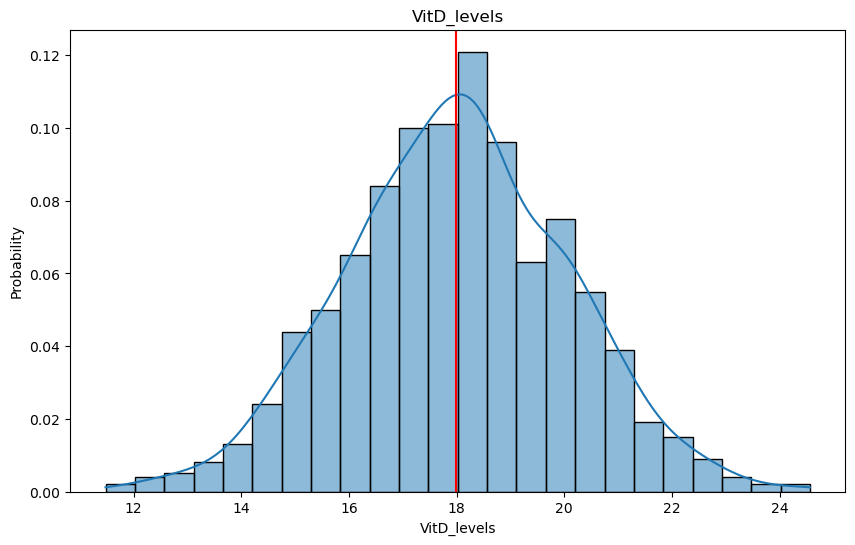

In [23]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['VitD_levels'], ax = ax, stat='probability',kde=True)
ax.axvline(mean_vit, color = 'red')
ax.set_title('VitD_levels')

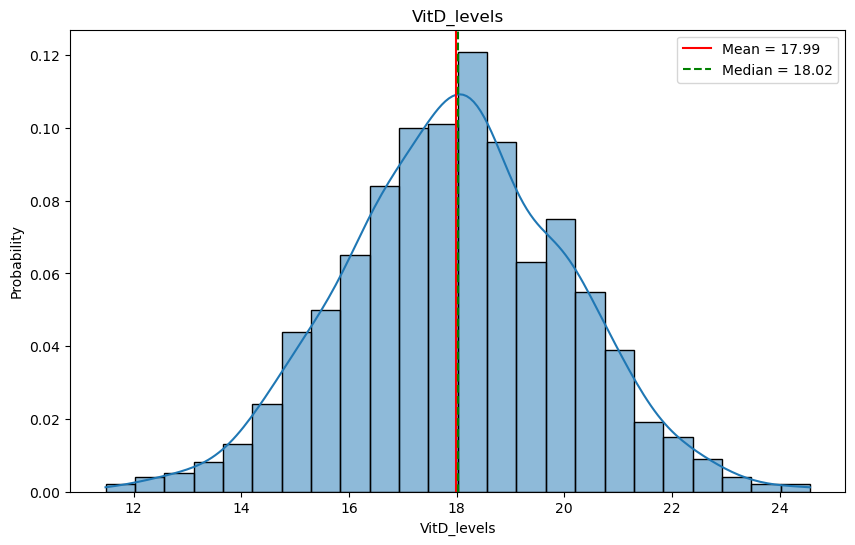

In [24]:
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.set_title(f'{col}')
ax.legend();

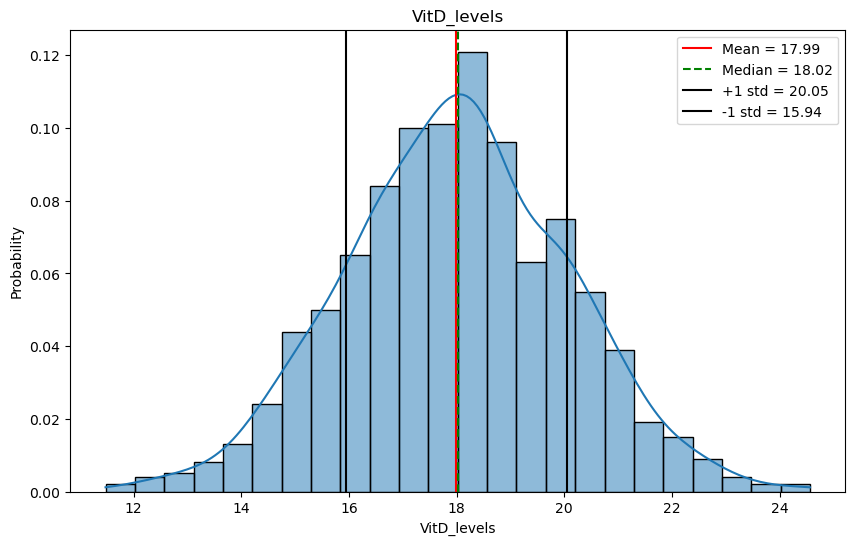

In [25]:
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.set_title(f'{col}')
ax.legend();

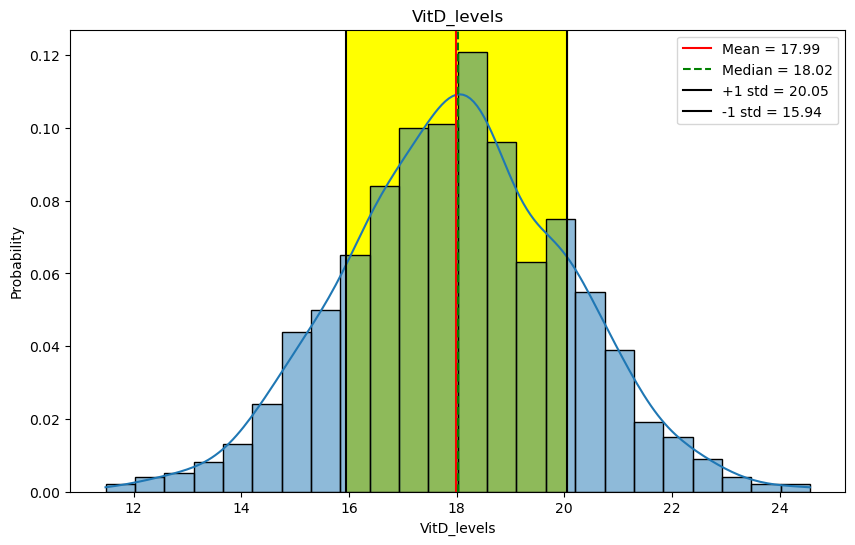

In [26]:
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

### Is this an example of Discrete and Contimous Data

The VitD_levels feature is an example of Discrete Data

###Does it have a skew? If so, which direction (+/-)?

This is normal curve doesnt skew negative or positively

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [29]:
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt


3.013147515833447

Data is displaying Mesokurtic kurtosis

##Doc_Visits

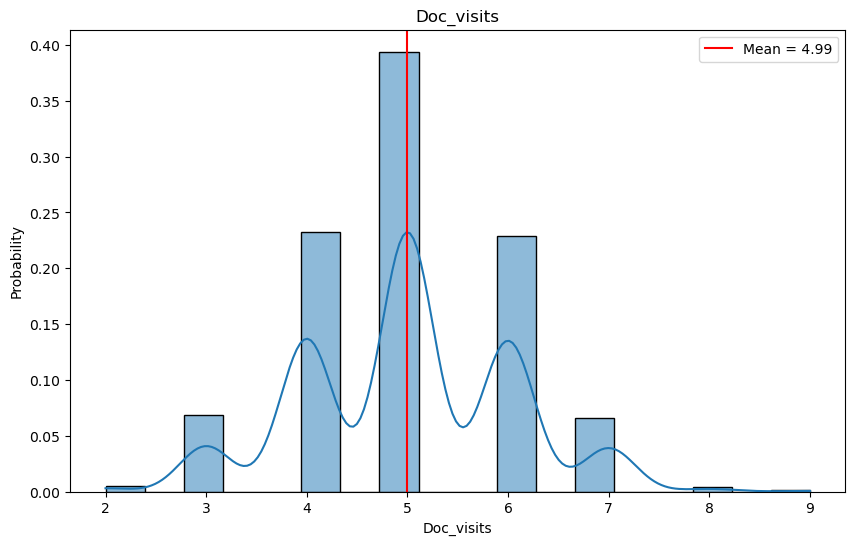

In [30]:
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.set_title(f'{col}')
ax.legend();

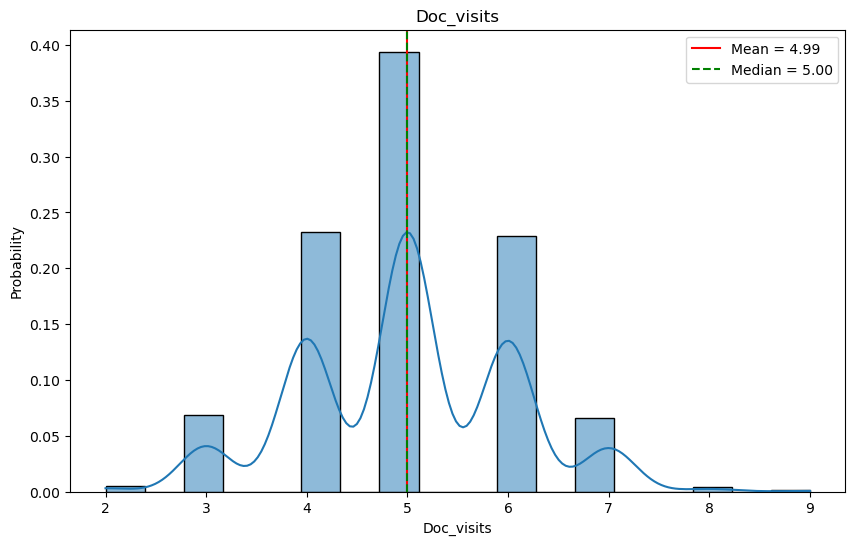

In [31]:
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.set_title(f'{col}')
ax.legend();

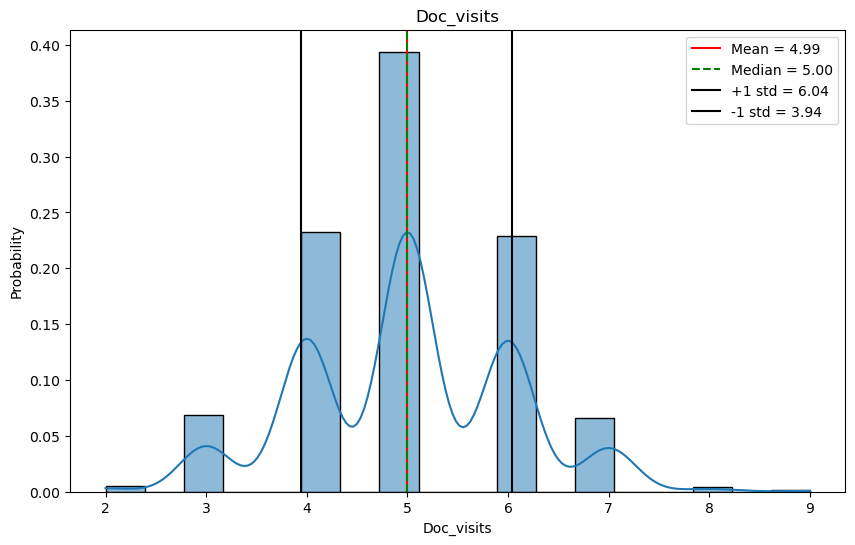

In [32]:
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.set_title(f'{col}')
ax.legend();

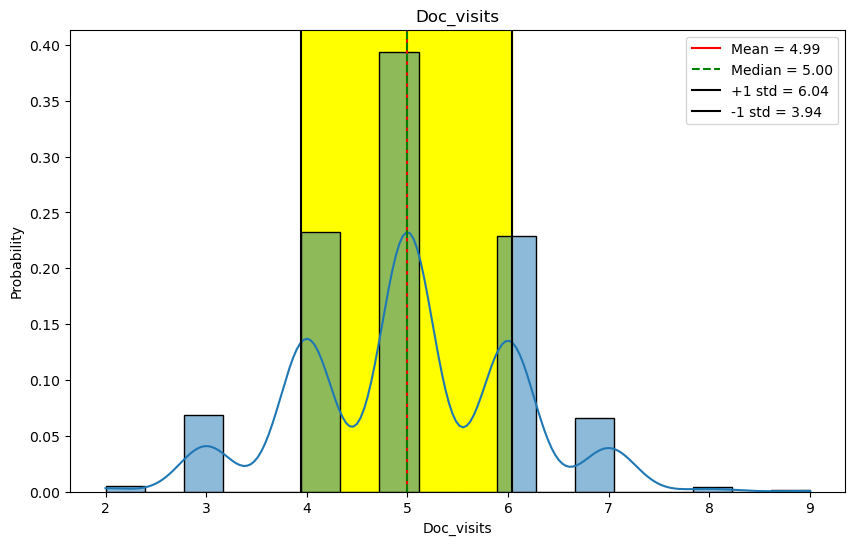

In [33]:
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

### Is this an example of Discrete and Contimous Data

This is an example of continuous data

In [ ]:
###Does it have a skew? If so, which direction (+/-)

In [ ]:
This is normal curve doesnt skew negative or positively

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [34]:
kurt_doc = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt_doc

2.9919958083381206

Data is displaying Platykurtic kurtosis

##TotalCharge

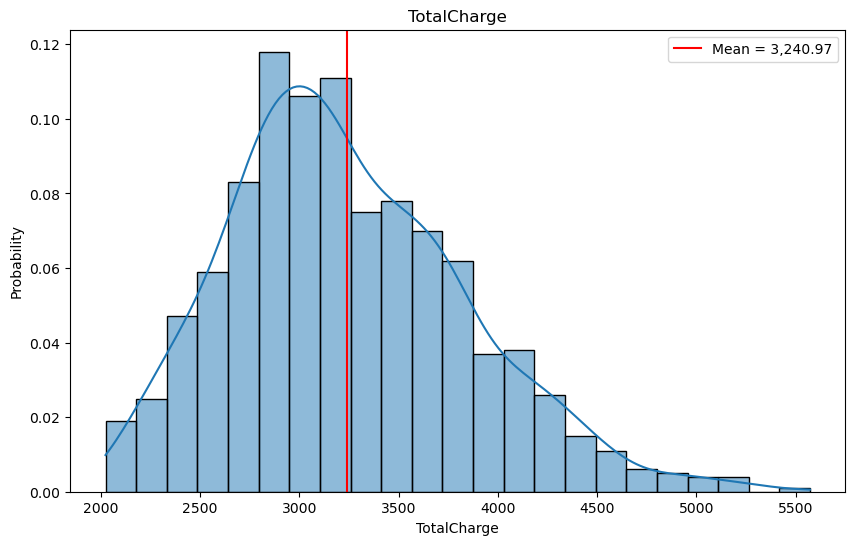

In [37]:
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.set_title(f'{col}')
ax.legend();

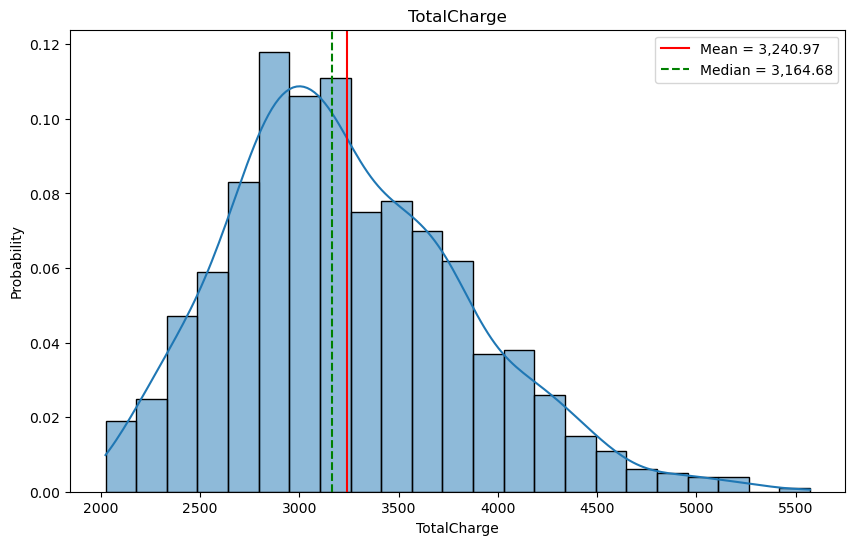

In [38]:
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.set_title(f'{col}')
ax.legend();

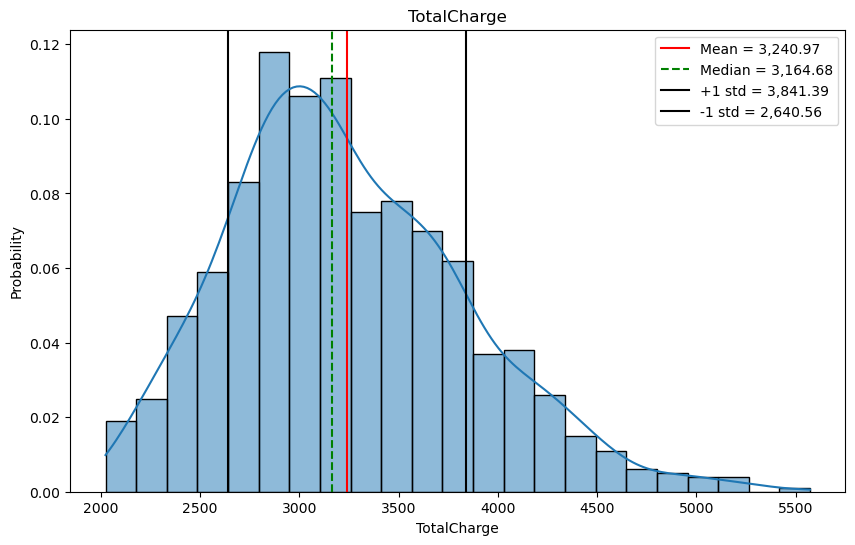

In [39]:
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.set_title(f'{col}')
ax.legend();

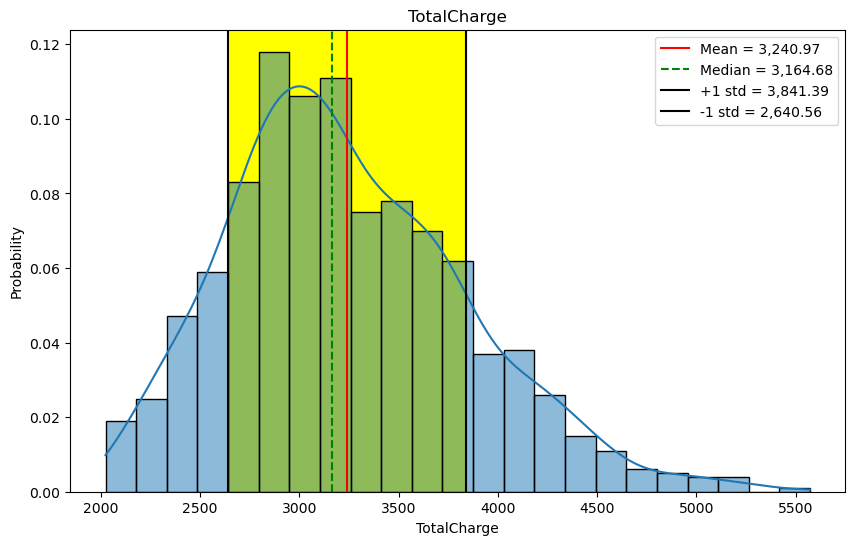

In [41]:
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

### Is this an example of Discrete and Contimous Data

This is an example of continuous data

###Does it have a skew? If so, which direction (+/-)

The distribution is slightly skewed to the leff (-)

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)?

In [42]:
kurt_charge = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt_charge

2.9919958083381206

In [ ]:
Data is displaying Platykurtic kurtosis